In [3]:
import pandas as pd

df_encoded = pd.read_csv('/content/insurance_cleaned.csv')

df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,0,1,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,1,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,1,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,1,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,1,0,1,0,0


Spil data

In [4]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Train set shape: (1070, 8)
Test set shape: (268, 8)


Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # RMSE è la radice quadrata del MSE
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Metrics:")
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R²: {r2_linear}")

Linear Regression Metrics:
MAE: 4181.194473753651
MSE: 33596915.851361476
RMSE: 5796.284659276274
R²: 0.7835929767120722


Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Metrics:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")

Random Forest Regressor Metrics:
MAE: 2545.214924655166
MSE: 20866223.19798948
RMSE: 4567.956129166466
R²: 0.8655948876523016


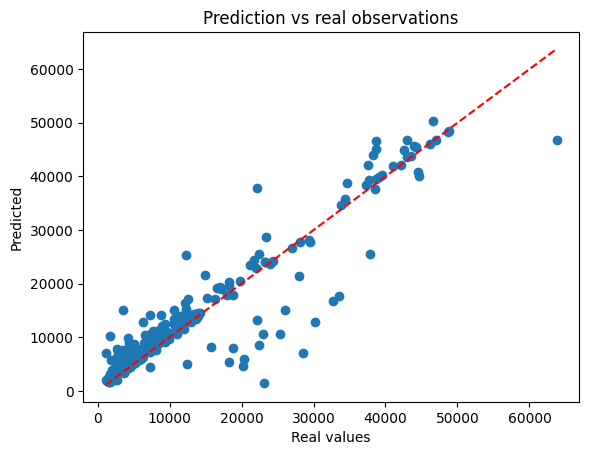

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real values')
plt.ylabel('Predicted')
plt.title('Prediction vs real observations')
plt.show()

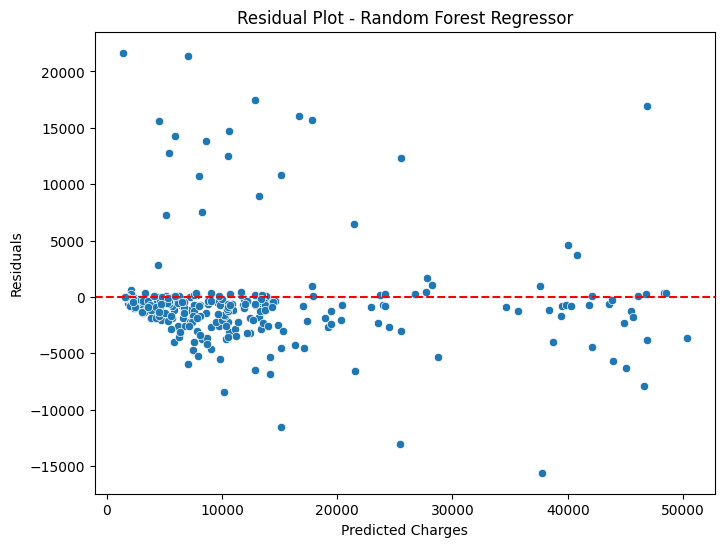

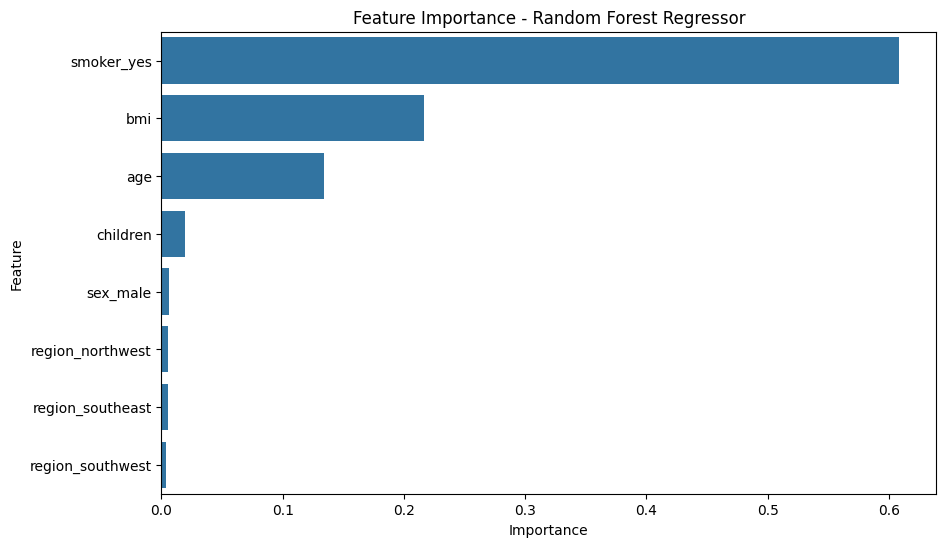

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

residuals_rf = y_test - y_pred_rf

# 2. Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot - Random Forest Regressor')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

feature_importance = rf_model.feature_importances_

feature_names = df_encoded.drop('charges', axis=1).columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest Regressor')
plt.show()

Prediction for a new customer

In [18]:
new_data = {
    'age': [45],
    'bmi': [30],
    'children': [2],
    'sex_male': [0],  # 0 per female, 1 per male
    'smoker_yes': [1],  # 1 per sì, 0 per no
    'region_northwest': [0],  # 0 per non appartenente a questa regione
    'region_southeast': [1],  # 1 per questa regione
    'region_southwest': [0]
}

new_client_df = pd.DataFrame(new_data)

new_client_df = new_client_df[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]

predicted_cost = rf_model.predict(new_client_df)

print(f"the insurance cost for new customer is: ${predicted_cost[0]:.2f}")

the insurance cost for new customer is: $49133.73


In [21]:
import os
import joblib

os.makedirs('/content/insurance-cost-prediction/models', exist_ok=True)

model_path = '/content/insurance-cost-prediction/models/random_forest_model.pkl'
joblib.dump(rf_model, model_path)

print(f"Modello salvato come: {model_path}")

Modello salvato come: /content/insurance-cost-prediction/models/random_forest_model.pkl
